# Метод Ньютона

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

### Требуется реализовать метод Ньютона:
$x_{k+1} = x_{k} - (\nabla ^{2}f(x_{k}))^{-1}\nabla f(x_{k})$

Рассмотрим функцию одной переменной $\ln(e^{x}+e^{-x})$

In [110]:
def plot_convergence_1d(func, steps, title="Метод Ньютона", arrow_kwargs={}): #код для построения графика сходимости
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    ax.set_title(title)
    grid = np.linspace(np.min(steps[:, 0]), np.max(steps[:, 0]), 100)
    fgrid = func(grid)
    ax.plot(grid, fgrid)
    yrange = np.max(fgrid) - np.min(fgrid)
    for i, step in enumerate(steps):
        if i + 1 < len(steps):
            ax.arrow(
                step[0], step[1], 
                steps[i+1][0] - step[0],
                steps[i+1][1] - step[1], 
                **arrow_kwargs
            )
            ax.annotate("{}".format(i+1), 
                        (step[0], step[1] + 0.01 * yrange),
                        size=14)
    ax.scatter(steps[:, 0], steps[:, 1], verts=5)
    ax.scatter(*steps[-1], color="red")
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$y$")
    plt.show()

[1.336433701356226, 1.1259715053642099, 0.8470603728262314, 0.48536879302776204, 0.12628498208139682, 0.002649304554273965]
[1.4032077864898473, 1.225992961986795, 1.015756803087288, 0.8065849123869183, 0.701100023993919, 0.6931506899631507]


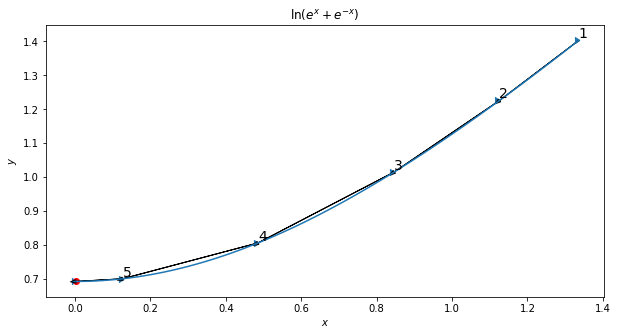

In [115]:
def newtons_method(a):
    g = grad(a)
    h = hess(a)
    x = a - h * g
    return x

a = 1.5
coor_x = []
coor_y = []

for x in range(6):
    b = newtons_method(a)
    coor_x.append(b)
    coor_y.append(f(b))
    a = b
    
print(coor_x)
print(coor_y)
itog = np.array([coor_x, coor_y])

plot_convergence_1d(
    f, 
    itog.T,
    title=r"$\ln(e^{x}+e^{-x}$)",
    arrow_kwargs={"width" : 0.0001, "head_width" : 0.01}
)

В качестве следующей исследуемой функции возьмём функцию из домашнего задания $f(x, y) = 2x^{2} + y^{4} - 2y^{2} - 200$. Там мы получили точку минимума $(0, 1)$.

In [51]:
def f(x, y): #наша функция
    return 2 * (x ** 2) + (y ** 4) - 2 * (y ** 2) - 200

def gradient_x(point_x): #первая производная по x в точке point_x
    return 4 * point_x

def gradient_y(point_y): #первая производная по y в точке point_y
    return 4 * point_y ** 3 - 4 * point_y

def gradient_sx(point_x): #вторая производная по x в точке point_x
    return 4

def gradient_sy(point_y): #вторая производная по y в точке point_y
    return 12 * point_y ** 2 - 4

def gradient_xy(point_x, point_y): #производная по x, затем по y
    return 0

In [52]:
def newtons_method(a):
    g1 = gradient_x(a[0])
    g2 = gradient_y(a[1])
    g = np.array([g1, g2])
    a00 = gradient_sx(a[0])
    a01 = gradient_xy(a[0], a[1])
    a10 = gradient_xy(a[0], a[1])
    a11 = gradient_sy(a[1])
    m = np.array([[a00, a01], [a10, a11]])
    im = np.linalg.inv(m)
    x = a - np.array(np.dot(im, g))
    return x

In [4]:
a = np.array([7, 10])
coor_x = []
coor_y = []
coor_z = []
for x in range(10): #за 10 шагов метод Ньютона нашёл минимум функции
    b = newtons_method(a)
    coor_x.append(b[0])
    coor_y.append(b[1])
    coor_z.append(f(b[0], b[1]))
    a = b

[0.         6.68896321]
[0.        4.4927804]
[0.         3.04547953]
[0.         2.10600774]
[0.         1.51809807]
[0.         1.18319971]
[0.         1.03530863]
[0.         1.00172782]
[0.         1.00000446]
[0. 1.]


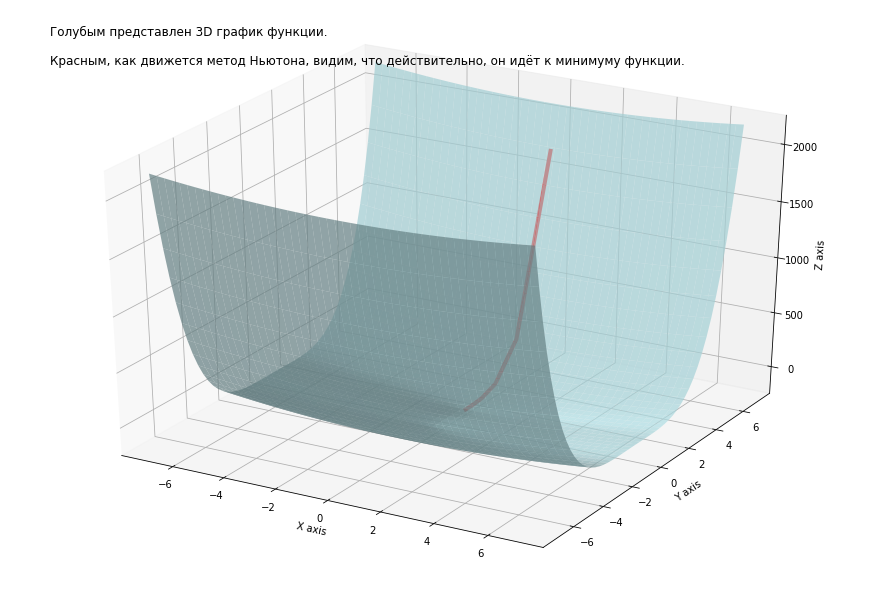

In [5]:
X = 7
N = 50
u = np.linspace(-X, X, N)
x, y = np.meshgrid(u, u)
z = 2 * (x ** 2) + (y ** 4) - 2 * (y ** 2) - 200
z = np.array(z)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(coor_x, coor_y, coor_z, color='r', linewidth = 4)
ax.plot_surface(x, y, z, rstride=1, cstride=1, color = 'powderblue', alpha = 0.7)
ax.text2D(0.05, 0.95, "Голубым представлен 3D график функции.", fontsize = 12, transform = ax.transAxes)
ax.text2D(0.05, 0.90, "Красным, как движется метод Ньютона, видим, что действительно, он идёт к минимуму функции.", 
          fontsize=12, transform = ax.transAxes)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

Поскольку метод Ньютона не зависит не от каких параметров, то мы можем посмотреть какая есть зависимость между начальными точками(откуда мы начинаем поиск минимума) и количеством итераций метода Ньютона.

In [67]:
c = [[10, 10], [9, 10], [8, 10], [7, 10], [6, 10], [5, 10], [4, 10], [3, 10], [2, 10], [1, 10]]
d = [[10, 10], [10, 9], [10, 8], [10, 7], [10, 6], [10, 5], [10, 4], [10, 3], [10, 2], [10, 1]]
f = [[10, 10], [9, 9], [8, 8], [7, 7], [6, 6], [5, 5], [4, 4], [3, 3], [2, 2], [1, 1]]

def count_iter(arr):
    x = 0
    y = 1
    flag = True
    eps = 1e-8
    iterations = []
    for i in range(10):
        flag = True
        k = 0
        a = np.array(arr[i])
        while(flag): #за 10 шагов метод Ньютона нашёл минимум функции
            k = k + 1
            b = newtons_method(a)
            if ((x - b[0]) ** 2 + (y - b[1]) ** 2 < eps):
                flag = False
            a = b
        iterations.append(k)
    return iterations

fir = count_iter(c)
sec = count_iter(d)
thi = count_iter(f)

print(fir)
print(sec)
print(thi)

[9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
[9, 9, 9, 8, 8, 7, 7, 6, 5, 1]
[9, 9, 9, 8, 8, 7, 7, 6, 5, 1]


<Figure size 864x576 with 0 Axes>

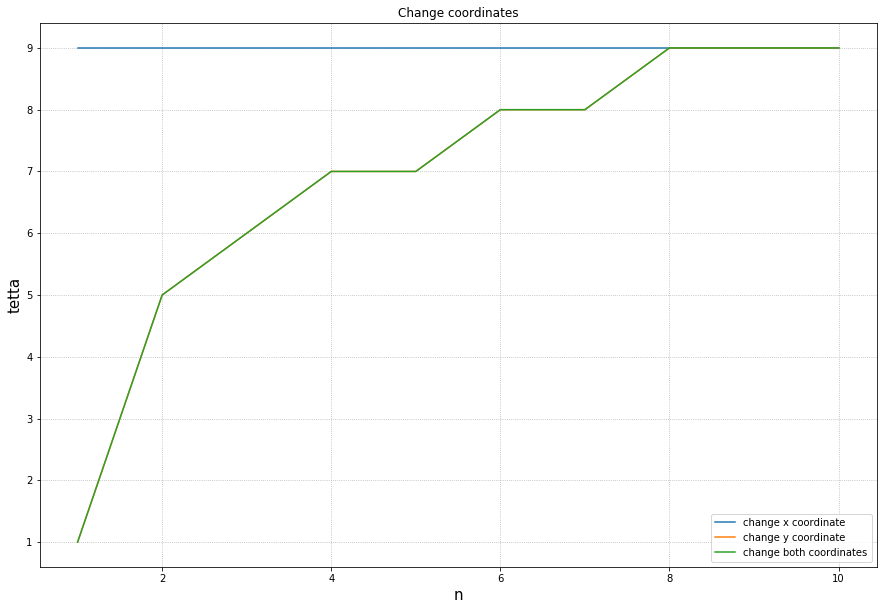

In [69]:
plt.figure() #рисуем график (n, tetta) с доверительными интервалами и sample'ом
plt.figure(figsize = (15, 10))
plt.plot(np.arange(1, 11, 1), fir[::-1], label = 'change x coordinate')
plt.plot(np.arange(1, 11, 1), sec[::-1], label = 'change y coordinate')
plt.plot(np.arange(1, 11, 1), thi[::-1], label = 'change both coordinates')
#plt.scatter(np.arange(0, 100, 1), sample, alpha = 0.5, s = 30, label = 'sample', color = 'green')
plt.xlabel('n', size = 15)
plt.ylabel('tetta', size = 15)
plt.grid(ls = ':')
plt.title('Change coordinates')
plt.legend()
plt.show()

Теперь рассмотрим функцию трёх переменных: $f(x, y, z) = -x^{2}-5y^{2}-3z^{2} + xy - 2xz + 2yz + 11x + 2y + 18z + 10$, её максимум это точка $(4, 1, 2)$

In [32]:
def f(x, y, z):
    return - x ** 2 - 5 * y ** 2 - 3 * z ** 2 + x * y - 2 * x * z + 2 * y * z + 11 * x + 2 * y + 18 * z + 10

def gradient_x(point_x, point_y, point_z):
    return -2 * point_x + point_y - 2 * point_z + 11

def gradient_y(point_x, point_y, point_z):
    return -10 * point_y + point_x + 2 * point_z + 2

def gradient_z(point_x, point_y, point_z):
    return -6 * point_z - 2 * point_x + 2 * point_y + 18

def gradient_sx(point_x, point_y, point_z):
    return -2

def gradient_sy(point_x, point_y, point_z):
    return -10

def gradient_sz(point_x, point_y, point_z):
    return -6

def gradient_xy(point_x, point_y, point_z):
    return 1

def gradient_xz(point_x, point_y, point_z):
    return -2

def gradient_yz(point_x, point_y, point_z):
    return 2

In [33]:
def newtons_method(a):
    g1 = gradient_x(a[0], a[1], a[2])
    g2 = gradient_y(a[0], a[1], a[2])
    g3 = gradient_z(a[0], a[1], a[2])
    g = np.array([g1, g2, g3])
    a00 = gradient_sx(a[0], a[1], a[2])
    a01 = gradient_xy(a[0], a[1], a[2])
    a02 = gradient_xz(a[0], a[1], a[2])
    a10 = gradient_xy(a[0], a[1], a[2])
    a11 = gradient_sy(a[0], a[1], a[2])
    a12 = gradient_yz(a[0], a[1], a[2])
    a20 = gradient_xz(a[0], a[1], a[2])
    a21 = gradient_yz(a[0], a[1], a[2])
    a22 = gradient_sz(a[0], a[1], a[2])
    m = np.array([[a00, a01, a02], [a10, a11, a12], [a20, a21, a22]])
    im = np.linalg.inv(m)
    x = a - np.array(np.dot(im, g))
    return x

In [50]:
a = np.array([5, 5, 5])
x = 4
y = 1
z = 2
eps = 1e-8
flag = True
while(flag):
    b = newtons_method(a)
    if((x - b[0]) ** 2 + (y - b[1]) ** 2 + (z - b[2]) ** 2 < eps):
        flag = False 
    a = b
print(a) #видим, что действительно метод Ньютона нашёл точку экстремума

[4. 1. 2.]


## Вывод:
Метод Ньютона работает хорошо. От увеличения расстояния от начальной точки до точки минимума увеличивается количество итераций. Было произведено исследование на функциях трёх размерностей.